<a href="https://colab.research.google.com/github/datle2403/datle2403/blob/main/Working_with_unlabeled_data%2C_clustering_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-mean
Protoype based clustering: centroid (take average), medioid(take most representive neighbor).

Drawback: have to choose k-neighbor

# elbow method and silhoue e plots
is a method that help us to choose k.

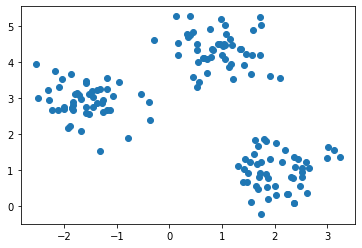

In [1]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
X,y= make_blobs(n_samples=150,n_features=2, centers=3, cluster_std=0.5, shuffle= True, random_state=0)
plt.scatter(X[:,0],X[:,1])

In [ ]:
y

array([1, 0, 0, 0, 1, 0, 0, 1, 2, 0, 1, 2, 2, 0, 0, 2, 2, 1, 2, 1, 0, 1,
       0, 0, 2, 1, 1, 0, 2, 1, 2, 2, 2, 2, 0, 1, 1, 1, 0, 0, 2, 2, 0, 1,
       1, 1, 2, 0, 2, 0, 1, 0, 0, 1, 1, 2, 0, 1, 2, 0, 2, 2, 2, 2, 0, 2,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 2, 2, 0, 1, 1, 0, 0, 1, 1, 1, 2,
       2, 1, 1, 0, 1, 0, 1, 0, 2, 2, 1, 1, 1, 1, 2, 1, 1, 0, 2, 0, 0, 0,
       2, 0, 1, 2, 0, 2, 0, 0, 2, 2, 0, 1, 0, 0, 1, 1, 2, 1, 2, 2, 2, 2,
       1, 2, 2, 2, 0, 2, 1, 2, 0, 0, 1, 1, 2, 2, 2, 2, 1, 1])

k-mean algorithms:
1. Randomly pick k centroids from the examples as initial cluster centers.

2. Assign each example to the nearest centroid,

3. Move the centroids to the center of the examples that were assigned to it.

4. Repeat steps 2 and 3 until the cluster assignments do not change or a user-defined tolerance or maximum number of iterations is reached.

How do we measure similarity between two point x,y:
Use squared Euclidean distiance:

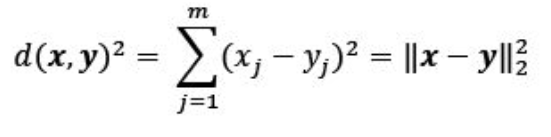

From there, we can derive the optimization function (cost function) through sum of squared error

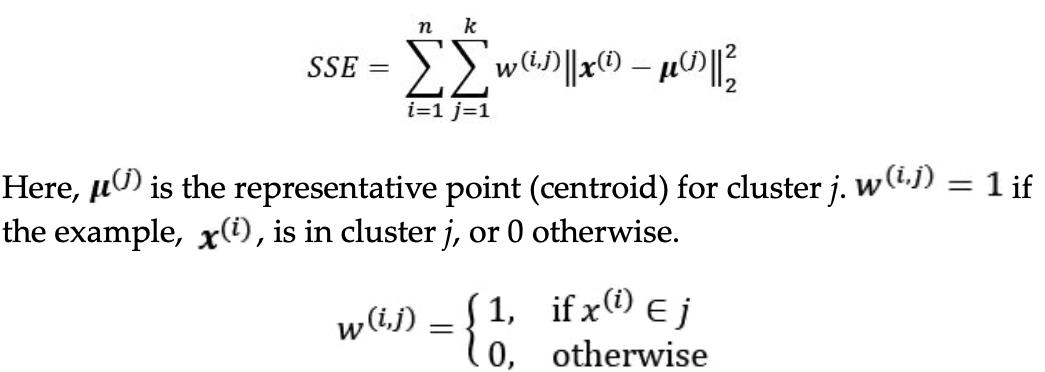

In [ ]:
from sklearn.cluster import KMeans
km= KMeans(n_clusters=3, init='random',n_init=10,max_iter=300, tol= 1e-04, random_state=0)
y_m=km.fit_predict(X)

n_init=10 to run k_mean clustering 10 time independently, with different random centroids to choose the final model as the one with the lowest SSE.

max_iter: iteration for each run (300)

One way to deal with convergence problems is to choose larger values for tol , which is a parameter that controls the tolerance with regard to the changes in the within-cluster SSE to declare convergence.

When we are applying k-means to real-world data using a Euclidean distance metric, we want to make sure that the features are measured on the same scale and apply z-score standardization or min-max scaling if necessary.

he other properties of k-means are that clusters do not overlap and are not hierarchical, and we also assume that there is at least one item in each cluster

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y,y_m)

1.0

In [ ]:
m=km.cluster_centers_
m

array([[ 0.9329651 ,  4.35420712],
       [ 2.06521743,  0.96137409],
       [-1.5947298 ,  2.92236966]])

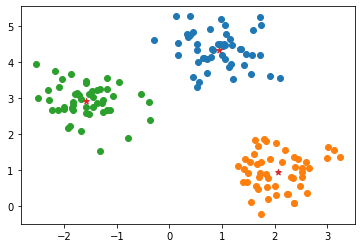

In [ ]:
plt.scatter(X[y_m==0,0],X[y_m==0,1])
plt.scatter(X[y_m==1,0],X[y_m==1,1])
plt.scatter(X[y_m==2,0],X[y_m==2,1])
plt.scatter(m[:,0],m[:,1],marker='*')

hierarchical and density-based clustering: which does not need to choose k-mean

# A smarter way of placing the initial cluster centroids using k-means++.

which uses a random seed to place the initial centroids, which can sometimes result in bad clusterings or slow convergence if the initial centroids are chosen poorly. One way to address this issue is to run the k-means algorithm multiple times on a dataset and choose the best performing model in terms of the SSE.

Another strategy is to place the initial centroids far away from each other via the k-means++ algorithm, which leads to be er and more consistent results than the classic k-means

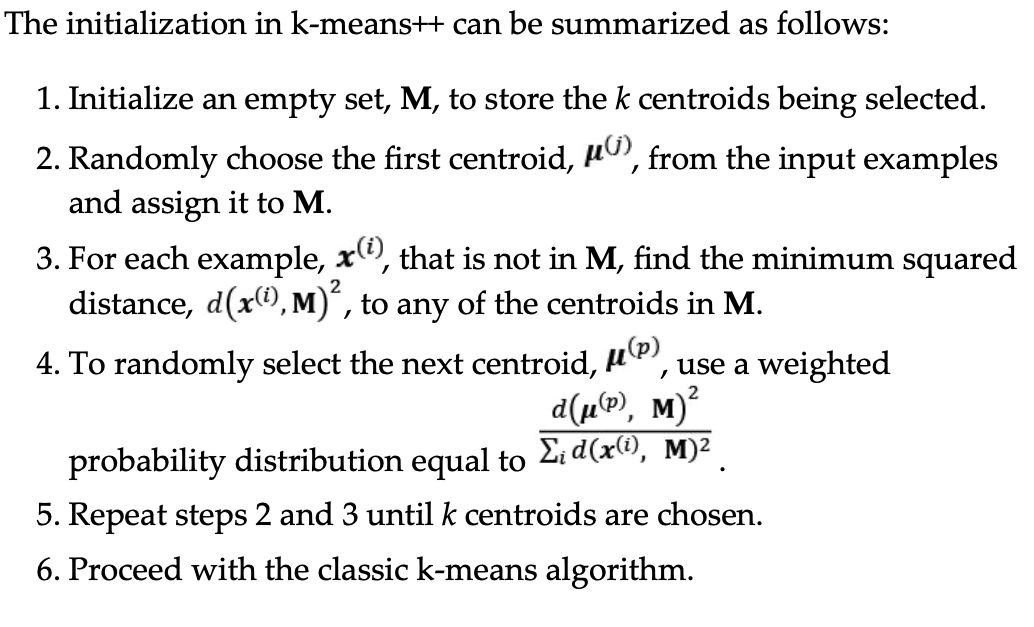

In [ ]:
from sklearn.cluster import KMeans
km= KMeans(n_clusters=3, init='k-means++',n_init=10,max_iter=300, tol= 1e-04, random_state=0)
y_m=km.fit_predict(X)

# Hard versus soft clustering
Hard clustering: each example is assign to exactly 1 cluster
(k-means, k-means++)

soft clustering: 1 ex >1 cluster (fuzzy C-means (FCM))

The FCM procedure is very similar to k-means. However, we replace the hard cluster assignment with probabilities for each point belonging to each cluster.

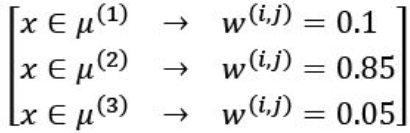

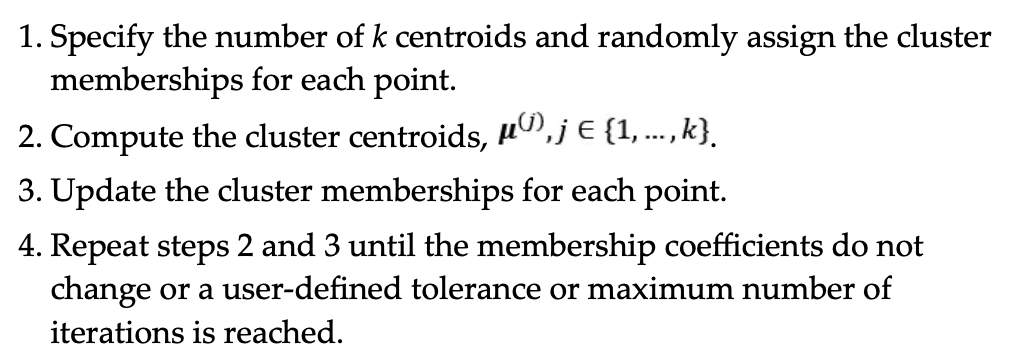

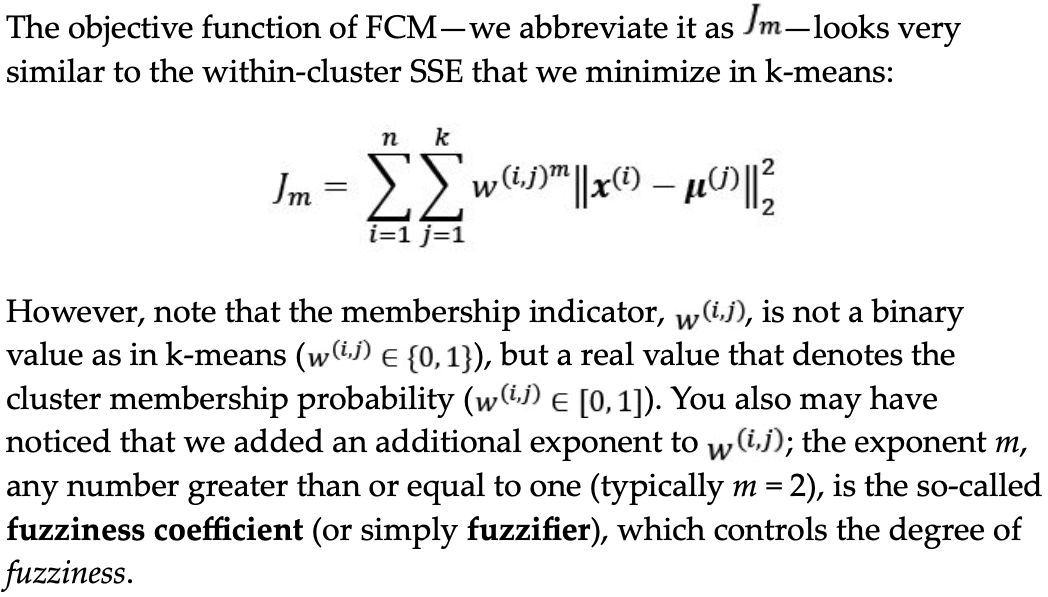

The larger the value of m, the smaller the cluster membership, , becomes, which leads to fuzzier clusters. The cluster membership
  
probability itself is calculated as follows:

Compute the SSE:
km.inertia_


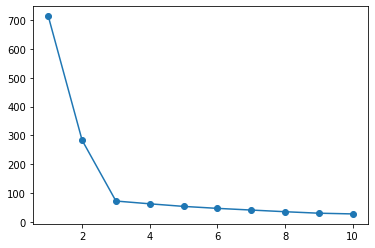

In [ ]:
distortions = []
m= range(1,11)
for i in m:
  km= KMeans(n_clusters=i, init='k-means++',n_init=10,max_iter=300, tol= 1e-04, random_state=0)
  km.fit(X)
  distortions.append(km.inertia_)
plt.plot(m,distortions,marker='o')

As you can see in the following plot, the elbow is located at k = 3, so this is evidence that k = 3 is indeed a good choice for this dataset:

# Quantifying the quality of clustering via silhouette plots

Silhoue e analysis can be used as a graphical tool to plot a measure of how tightly grouped the examples in the clusters are.



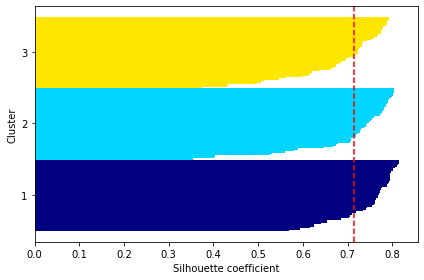

In [3]:
import numpy as np
from matplotlib import cm
from sklearn.metrics import silhouette_samples
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, 
            init='k-means++', 
            n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=0)
y_km = km.fit_predict(X)

cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, 
             edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
    
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--") 

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')

plt.tight_layout()
#plt.savefig('images/11_04.png', dpi=300)
plt.show()


# Organizing clusters as a hierarchical tree

One advantage of the hierarchical clustering algorithm is that it allows us to plot dendrograms

Another advantage of this hierarchical approach is that we do not need to specify the number of clusters upfront.

The two main approaches to hierarchical clustering are agglomerative and divisive hierarchical clustering. In divisive hierarchical clustering, we start with one cluster that encompasses the complete dataset, and we iteratively split the cluster into smaller clusters until each cluster only contains one example. In this section, we will focus on agglomerative clustering, which takes the opposite approach. We start with each example as an individual cluster and merge the closest pairs of clusters until only one cluster remains.

The two standard algorithms for agglomerative hierarchical clustering are single linkage and complete linkage. Using single linkage, we compute the distances between the most similar members for each pair of clusters and merge the two clusters for which the distance between the most similar members is the smallest. The complete linkage approach is similar to single linkage but, instead of comparing the most similar members in each pair of clusters, we compare the most dissimilar members to perform the merge
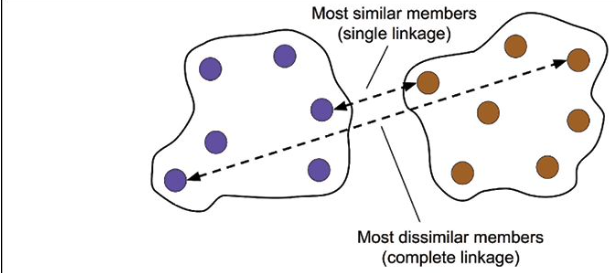

In this section, we will focus on agglomerative clustering using the complete linkage approach. Hierarchical complete linkage clustering is an iterative procedure that can be summarized by the following steps:

1. Compute the distance matrix of all examples.
2. Represent each data point as a singleton cluster.
3. Merge the two closest clusters based on the distance between the most dissimilar (distant) members.
4. Update the similarity matrix.
5. Repeat steps 2-4 until one single cluster remains.

In [4]:
import pandas as pd
import numpy as np
np.random.seed(123)
variables=['X','Y','Z']
labels = ['ID_0', 'ID_1', 'ID_2', 'ID_3', 'ID_4']
X = np.random.random_sample([5, 3])*10
df = pd.DataFrame(X, columns=variables, index=labels)
df


X         Y         Z
ID_0  6.964692  2.861393  2.268515
ID_1  5.513148  7.194690  4.231065
ID_2  9.807642  6.848297  4.809319
ID_3  3.921175  3.431780  7.290497
ID_4  4.385722  0.596779  3.980443

In [5]:
from scipy.spatial.distance import pdist, squareform

row_dist = pd.DataFrame(squareform(pdist(df, metric='euclidean')),
                        columns=labels,
                        index=labels)
row_dist

ID_0      ID_1      ID_2      ID_3      ID_4
ID_0  0.000000  4.973534  5.516653  5.899885  3.835396
ID_1  4.973534  0.000000  4.347073  5.104311  6.698233
ID_2  5.516653  4.347073  0.000000  7.244262  8.316594
ID_3  5.899885  5.104311  7.244262  0.000000  4.382864
ID_4  3.835396  6.698233  8.316594  4.382864  0.000000

Using the preceding code, we calculated the Euclidean distance between each pair of input examples in our dataset based on the features X , Y , and Z .

In [7]:
from scipy.cluster.hierarchy import linkage
row_clusters = linkage(pdist(df, metric='euclidean'), method='complete')
pd.DataFrame(row_clusters,
             columns=['row label 1', 'row label 2',
                      'distance', 'no. of items in clust.'],
             index=['cluster %d' % (i + 1) 
                    for i in range(row_clusters.shape[0])])


row label 1  row label 2  distance  no. of items in clust.
cluster 1          0.0          4.0  3.835396                     2.0
cluster 2          1.0          2.0  4.347073                     2.0
cluster 3          3.0          5.0  5.899885                     3.0
cluster 4          6.0          7.0  8.316594                     5.0

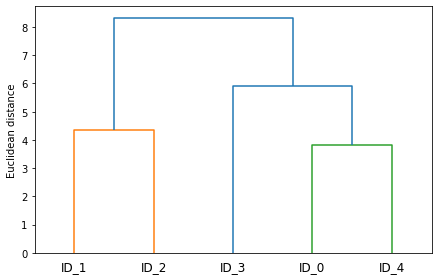

In [8]:
from scipy.cluster.hierarchy import dendrogram

# make dendrogram black (part 1/2)
# from scipy.cluster.hierarchy import set_link_color_palette
# set_link_color_palette(['black'])

row_dendr = dendrogram(row_clusters, 
                       labels=labels,
                       # make dendrogram black (part 2/2)
                       # color_threshold=np.inf
                       )
plt.tight_layout()
plt.ylabel('Euclidean distance')
#plt.savefig('images/11_11.png', dpi=300, 
#            bbox_inches='tight')
plt.show()

Attaching dendrograms to a heat map

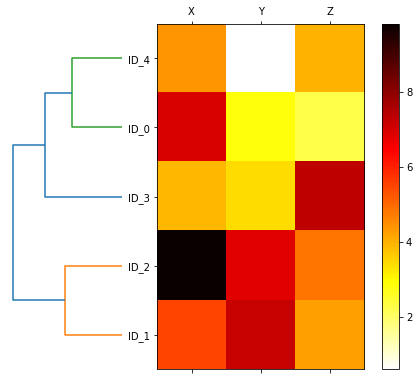

In [9]:
# plot row dendrogram
fig = plt.figure(figsize=(8, 8), facecolor='white')
axd = fig.add_axes([0.09, 0.1, 0.2, 0.6])

# note: for matplotlib < v1.5.1, please use orientation='right'
row_dendr = dendrogram(row_clusters, orientation='left')

# reorder data with respect to clustering
df_rowclust = df.iloc[row_dendr['leaves'][::-1]]

axd.set_xticks([])
axd.set_yticks([])

# remove axes spines from dendrogram
for i in axd.spines.values():
    i.set_visible(False)

# plot heatmap
axm = fig.add_axes([0.23, 0.1, 0.6, 0.6])  # x-pos, y-pos, width, height
cax = axm.matshow(df_rowclust, interpolation='nearest', cmap='hot_r')
fig.colorbar(cax)
axm.set_xticklabels([''] + list(df_rowclust.columns))
axm.set_yticklabels([''] + list(df_rowclust.index))

#plt.savefig('images/11_12.png', dpi=300)
plt.show()


# Locating regions of high density via DBSCAN

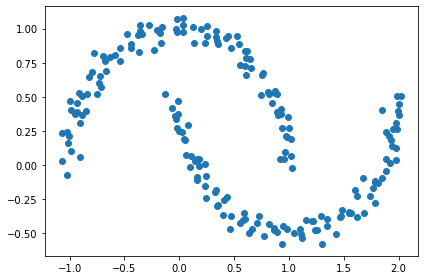

In [10]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=200, noise=0.05, random_state=0)
plt.scatter(X[:, 0], X[:, 1])
plt.tight_layout()
#plt.savefig('images/11_14.png', dpi=300)
plt.show()


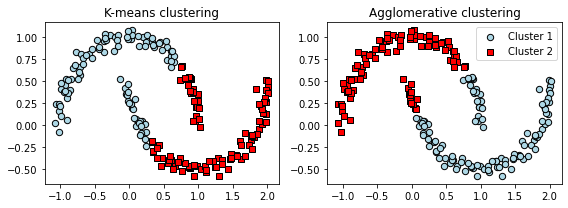

In [13]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 3))

km = KMeans(n_clusters=2, random_state=0)
y_km = km.fit_predict(X)
ax1.scatter(X[y_km == 0, 0], X[y_km == 0, 1],
            edgecolor='black',
            c='lightblue', marker='o', s=40, label='cluster 1')
ax1.scatter(X[y_km == 1, 0], X[y_km == 1, 1],
            edgecolor='black',
            c='red', marker='s', s=40, label='cluster 2')
ax1.set_title('K-means clustering')
from sklearn.cluster import AgglomerativeClustering
ac = AgglomerativeClustering(n_clusters=2,
                             affinity='euclidean',
                             linkage='complete')
y_ac = ac.fit_predict(X)
ax2.scatter(X[y_ac == 0, 0], X[y_ac == 0, 1], c='lightblue',
            edgecolor='black',
            marker='o', s=40, label='Cluster 1')
ax2.scatter(X[y_ac == 1, 0], X[y_ac == 1, 1], c='red',
            edgecolor='black',
            marker='s', s=40, label='Cluster 2')
ax2.set_title('Agglomerative clustering')

plt.legend()
plt.tight_layout()
#plt.savefig('images/11_15.png', dpi=300)
plt.show()

One of the main advantages of using DBSCAN is that it does not assume that the clusters have a spherical shape as in k-means. Furthermore, DBSCAN is different from k-means and hierarchical clustering in that it doesn't necessarily assign each point to a cluster but is capable of removing noise points.

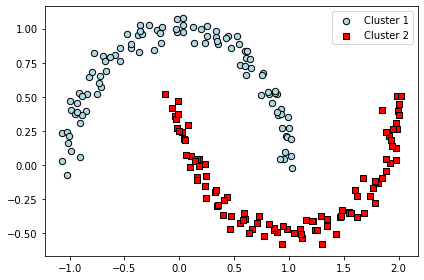

In [14]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.2, min_samples=5, metric='euclidean')
y_db = db.fit_predict(X)
plt.scatter(X[y_db == 0, 0], X[y_db == 0, 1],
            c='lightblue', marker='o', s=40,
            edgecolor='black', 
            label='Cluster 1')
plt.scatter(X[y_db == 1, 0], X[y_db == 1, 1],
            c='red', marker='s', s=40,
            edgecolor='black', 
            label='Cluster 2')
plt.legend()
plt.tight_layout()
#plt.savefig('images/11_16.png', dpi=300)
plt.show()

However, we should also note some of the disadvantages of DBSCAN. With an increasing number of features in our dataset—assuming a fixed number of training examples—the negative effect of the curse of dimensionality increases

DBSCAN (MinPts and   ) that need to be optimized to yield good clustering results. Finding a good combination of MinPts and   can be problematic if the density differences in the dataset are relatively large.